# Project: Wrangling and Analyze Data

In [2]:
# import all the libraries needed in this project
import pandas as pd
import numpy as np
import tweepy as tw
import config
import json
import os
import time
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data Gathering

In the cell below, i gatherered all three pieces of data for this project and loaded them in the notebook. **Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# Gathering the twitter_archive data
df_1 = pd.read_csv(r'C:\Users\lenovo\twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [64]:
# Programmatically download dataframe image_prediction.tsv using request library
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_url = requests.get(url)
with open("image_predictions.tsv", mode='wb')as file:
    file.write(image_url.content)
df_2 = pd.read_csv('image_predictions.tsv', sep='\t')
df_2.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3.Using Tweepy python library to query additional data via the Twitter API (tweet_json.txt)


In [5]:
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'


In [6]:
#authenticate twitter API access token
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [7]:
# Represent tweet_id as list
list(df_1)


['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [8]:
# Check the length of tweet_id
len(list(df_1.tweet_id))

2356

In [9]:
# Define a variable called tweets_ids to gather additonal data via Twitter's API
tweets_ids = df_1.tweet_id.values
tweets_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [10]:
# Check the length of tweets_ids to confirm it matches that of twitter_archive.tweet_id
len(tweets_ids)

2356

In [11]:
# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive
index = 0
# dictionary to catch the errors
errors = {}
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file
with open ('tweet_json.txt', mode='w') as tweets:
    # This will likely take time to run due of Twitter's rate limit
    for tweet_id in tweets_ids:
        index += 1
        try:
            # Get the status data for each of the tweet IDs
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print(str(index) + ". " + "ID - " + str(tweet_id))
            # Convert each tweet status to JSON string and save it in the tweet_bk file
            json.dump(tweet._json, tweets)
            # recognize \n as a break of text
            tweets.write("\n")
            
        # Catching errors that might occur while accessing the tweet data or content
        except tw.TweepyException as error:
            print(str(index) + ". " + "ID - " + str(tweet_id) + " has an error:", error.response.text)
            # Appending the errors to the dictionary; error_dict
            errors[tweet_id] = error
            
end = time.time()
print(end - start)

1. ID - 892420643555336193
2. ID - 892177421306343426
3. ID - 891815181378084864
4. ID - 891689557279858688
5. ID - 891327558926688256
6. ID - 891087950875897856
7. ID - 890971913173991426
8. ID - 890729181411237888
9. ID - 890609185150312448
10. ID - 890240255349198849
11. ID - 890006608113172480
12. ID - 889880896479866881
13. ID - 889665388333682689
14. ID - 889638837579907072
15. ID - 889531135344209921
16. ID - 889278841981685760
17. ID - 888917238123831296
18. ID - 888804989199671297
19. ID - 888554962724278272
20. ID - 888202515573088257 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
21. ID - 888078434458587136
22. ID - 887705289381826560
23. ID - 887517139158093824
24. ID - 887473957103951883
25. ID - 887343217045368832
26. ID - 887101392804085760
27. ID - 886983233522544640
28. ID - 886736880519319552
29. ID - 886680336477933568
30. ID - 886366144734445568
31. ID - 886267009285017600
32. ID - 886258384151887873
33. ID - 886054160059072513
34.

254. ID - 844704788403113984 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
255. ID - 844580511645339650
256. ID - 844223788422217728
257. ID - 843981021012017153
258. ID - 843856843873095681
259. ID - 843604394117681152
260. ID - 843235543001513987
261. ID - 842892208864923648 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
262. ID - 842846295480000512
263. ID - 842765311967449089
264. ID - 842535590457499648
265. ID - 842163532590374912
266. ID - 842115215311396866
267. ID - 841833993020538882
268. ID - 841680585030541313
269. ID - 841439858740625411
270. ID - 841320156043304961
271. ID - 841314665196081154
272. ID - 841077006473256960
273. ID - 840761248237133825
274. ID - 840728873075638272
275. ID - 840698636975636481
276. ID - 840696689258311684
277. ID - 840632337062862849
278. ID - 840370681858686976
279. ID - 840268004936019968
280. ID - 839990271299457024
281. ID - 839549326359670784
282. ID - 83929060051192

517. ID - 810984652412424192
518. ID - 810896069567610880
519. ID - 810657578271330305
520. ID - 810284430598270976
521. ID - 810254108431155201
522. ID - 809920764300447744
523. ID - 809808892968534016
524. ID - 809448704142938112
525. ID - 809220051211603969
526. ID - 809084759137812480
527. ID - 808838249661788160
528. ID - 808733504066486276
529. ID - 808501579447930884
530. ID - 808344865868283904
531. ID - 808134635716833280
532. ID - 808106460588765185
533. ID - 808001312164028416
534. ID - 807621403335917568
535. ID - 807106840509214720
536. ID - 807059379405148160
537. ID - 807010152071229440
538. ID - 806629075125202948
539. ID - 806620845233815552
540. ID - 806576416489959424
541. ID - 806542213899489280
542. ID - 806242860592926720
543. ID - 806219024703037440
544. ID - 805958939288408065
545. ID - 805932879469572096
546. ID - 805826884734976000
547. ID - 805823200554876929
548. ID - 805520635690676224
549. ID - 805487436403003392
550. ID - 805207613751304193
551. ID - 8047

792. ID - 773704687002451968
793. ID - 773670353721753600
794. ID - 773547596996571136
795. ID - 773336787167145985
796. ID - 773308824254029826
797. ID - 773247561583001600
798. ID - 773191612633579521
799. ID - 772877495989305348
800. ID - 772826264096874500
801. ID - 772615324260794368
802. ID - 772581559778025472
803. ID - 772193107915964416
804. ID - 772152991789019136
805. ID - 772117678702071809
806. ID - 772114945936949249
807. ID - 772102971039580160
808. ID - 771908950375665664
809. ID - 771770456517009408
810. ID - 771500966810099713
811. ID - 771380798096281600
812. ID - 771171053431250945
813. ID - 771136648247640064
814. ID - 771102124360998913
815. ID - 771014301343748096
816. ID - 771004394259247104 has an error: {"errors":[{"code":179,"message":"Sorry, you are not authorized to see this status."}]}
817. ID - 770787852854652928
818. ID - 770772759874076672
819. ID - 770743923962707968 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
820.

Rate limit reached. Sleeping for: 65


901. ID - 758740312047005698
902. ID - 758474966123810816
903. ID - 758467244762497024
904. ID - 758405701903519748
905. ID - 758355060040593408
906. ID - 758099635764359168
907. ID - 758041019896193024
908. ID - 757741869644341248
909. ID - 757729163776290825
910. ID - 757725642876129280
911. ID - 757611664640446465
912. ID - 757597904299253760
913. ID - 757596066325864448
914. ID - 757400162377592832
915. ID - 757393109802180609
916. ID - 757354760399941633
917. ID - 756998049151549440
918. ID - 756939218950160384
919. ID - 756651752796094464
920. ID - 756526248105566208
921. ID - 756303284449767430
922. ID - 756288534030475264
923. ID - 756275833623502848
924. ID - 755955933503782912
925. ID - 755206590534418437
926. ID - 755110668769038337
927. ID - 754874841593970688
928. ID - 754856583969079297
929. ID - 754747087846248448
930. ID - 754482103782404096
931. ID - 754449512966619136
932. ID - 754120377874386944
933. ID - 754011816964026368 has an error: {"errors":[{"code":144,"messa

1175. ID - 720059472081784833
1176. ID - 720043174954147842
1177. ID - 719991154352222208
1178. ID - 719704490224398336
1179. ID - 719551379208073216
1180. ID - 719367763014393856
1181. ID - 719339463458033665
1182. ID - 719332531645071360
1183. ID - 718971898235854848
1184. ID - 718939241951195136
1185. ID - 718631497683582976
1186. ID - 718613305783398402
1187. ID - 718540630683709445
1188. ID - 718460005985447936
1189. ID - 718454725339934721
1190. ID - 718246886998687744
1191. ID - 718234618122661888
1192. ID - 717841801130979328
1193. ID - 717790033953034240
1194. ID - 717537687239008257
1195. ID - 717428917016076293
1196. ID - 717421804990701568
1197. ID - 717047459982213120
1198. ID - 717009362452090881
1199. ID - 716802964044845056
1200. ID - 716791146589110272
1201. ID - 716730379797970944
1202. ID - 716447146686459905
1203. ID - 716439118184652801
1204. ID - 716285507865542656
1205. ID - 716080869887381504
1206. ID - 715928423106027520
1207. ID - 715758151270801409
1208. ID -

1449. ID - 696405997980676096
1450. ID - 696100768806522880
1451. ID - 695816827381944320
1452. ID - 695794761660297217
1453. ID - 695767669421768709
1454. ID - 695629776980148225
1455. ID - 695446424020918272
1456. ID - 695409464418041856
1457. ID - 695314793360662529
1458. ID - 695095422348574720
1459. ID - 695074328191332352
1460. ID - 695064344191721472
1461. ID - 695051054296211456
1462. ID - 694925794720792577
1463. ID - 694905863685980160
1464. ID - 694669722378485760
1465. ID - 694356675654983680
1466. ID - 694352839993344000
1467. ID - 694342028726001664
1468. ID - 694329668942569472
1469. ID - 694206574471057408
1470. ID - 694183373896572928
1471. ID - 694001791655137281
1472. ID - 693993230313091072
1473. ID - 693942351086120961
1474. ID - 693647888581312512
1475. ID - 693644216740769793
1476. ID - 693642232151285760
1477. ID - 693629975228977152
1478. ID - 693622659251335168
1479. ID - 693590843962331137
1480. ID - 693582294167244802
1481. ID - 693486665285931008
1482. ID -

1723. ID - 680115823365742593
1724. ID - 680100725817409536
1725. ID - 680085611152338944
1726. ID - 680070545539371008
1727. ID - 680055455951884288 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
1728. ID - 679877062409191424
1729. ID - 679872969355714560
1730. ID - 679862121895714818
1731. ID - 679854723806179328
1732. ID - 679844490799091713
1733. ID - 679828447187857408
1734. ID - 679777920601223168
1735. ID - 679736210798047232
1736. ID - 679729593985699840
1737. ID - 679722016581222400
1738. ID - 679530280114372609
1739. ID - 679527802031484928
1740. ID - 679511351870550016
1741. ID - 679503373272485890
1742. ID - 679475951516934144
1743. ID - 679462823135686656
1744. ID - 679405845277462528
1745. ID - 679158373988876288
1746. ID - 679148763231985668
1747. ID - 679132435750195208
1748. ID - 679111216690831360
1749. ID - 679062614270468097
1750. ID - 679047485189439488
1751. ID - 679001094530465792
1752. ID - 678991772295516161
1753. ID - 6789692

Rate limit reached. Sleeping for: 37


1801. ID - 676975532580409345
1802. ID - 676957860086095872
1803. ID - 676949632774234114
1804. ID - 676948236477857792
1805. ID - 676946864479084545
1806. ID - 676942428000112642
1807. ID - 676936541936185344
1808. ID - 676916996760600576
1809. ID - 676897532954456065
1810. ID - 676864501615042560
1811. ID - 676821958043033607
1812. ID - 676819651066732545
1813. ID - 676811746707918848
1814. ID - 676776431406465024
1815. ID - 676617503762681856
1816. ID - 676613908052996102
1817. ID - 676606785097199616
1818. ID - 676603393314578432
1819. ID - 676593408224403456
1820. ID - 676590572941893632
1821. ID - 676588346097852417
1822. ID - 676582956622721024
1823. ID - 676575501977128964
1824. ID - 676533798876651520
1825. ID - 676496375194980353
1826. ID - 676470639084101634
1827. ID - 676440007570247681
1828. ID - 676430933382295552
1829. ID - 676263575653122048
1830. ID - 676237365392908289
1831. ID - 676219687039057920
1832. ID - 676215927814406144
1833. ID - 676191832485810177
1834. ID -

2075. ID - 670842764863651840
2076. ID - 670840546554966016
2077. ID - 670838202509447168
2078. ID - 670833812859932673
2079. ID - 670832455012716544
2080. ID - 670826280409919488
2081. ID - 670823764196741120
2082. ID - 670822709593571328
2083. ID - 670815497391357952
2084. ID - 670811965569282048
2085. ID - 670807719151067136
2086. ID - 670804601705242624
2087. ID - 670803562457407488
2088. ID - 670797304698376195
2089. ID - 670792680469889025
2090. ID - 670789397210615808
2091. ID - 670786190031921152
2092. ID - 670783437142401025
2093. ID - 670782429121134593
2094. ID - 670780561024270336
2095. ID - 670778058496974848
2096. ID - 670764103623966721
2097. ID - 670755717859713024
2098. ID - 670733412878163972
2099. ID - 670727704916926465
2100. ID - 670717338665226240
2101. ID - 670704688707301377
2102. ID - 670691627984359425
2103. ID - 670679630144274432
2104. ID - 670676092097810432
2105. ID - 670668383499735048
2106. ID - 670474236058800128
2107. ID - 670468609693655041
2108. ID -

2349. ID - 666055525042405380
2350. ID - 666051853826850816
2351. ID - 666050758794694657
2352. ID - 666049248165822465
2353. ID - 666044226329800704
2354. ID - 666033412701032449
2355. ID - 666029285002620928
2356. ID - 666020888022790149
2309.478719472885


In [12]:
# Display the errors
print(errors)

{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No status found with tha

In [13]:
# Open text file for reading
api_list = []
with open ('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        tweet_line = json.loads(line)
        tweet_id = tweet_line['id']
        retwt_count = tweet_line['retweet_count']
        fav_count = tweet_line['favorite_count']
        follows_count = tweet_line['user']['followers_count']
        
        
        api_list.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count})
                       
        
tweet_json = pd.DataFrame(api_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count'])


 # Visual Assessment


In [14]:
df_1


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
tweet_json

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,6987,33762,9318437
1,892177421306343426,5289,29292,9318437
2,891815181378084864,3469,22022,9318437
3,891689557279858688,7212,36879,9318437
4,891327558926688256,7740,35251,9318437
...,...,...,...,...
2322,666049248165822465,36,88,9318430
2323,666044226329800704,115,247,9318430
2324,666033412701032449,36,100,9318430
2325,666029285002620928,39,112,9318430


In [17]:
# Using pandas functions and methods for programmatic assessment
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favorite_count   2327 non-null   int64
 3   followers_count  2327 non-null   int64
dtypes: int64(4)
memory usage: 72.8 KB


In [20]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
tweet_json.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

In [23]:
# checking for duplicated rows

df_1.duplicated().sum()

0

In [24]:
df_2.duplicated().sum()

0

In [25]:
tweet_json.duplicated().sum()

0

In [26]:
# Checking for descriptive statistics
df_1.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
tweet_json.describe()

,id,retweet_count,favorite_count,followers_count
count,2.327000e+03,2327.000000,2327.000000,2.327000e+03
mean,7.417930e+17,2465.553073,7042.852170,9.318431e+06
std,6.820795e+16,4175.197416,10945.107725,6.714144e+01
min,6.660209e+17,1.000000,0.000000,9.318402e+06
25%,6.781394e+17,493.500000,1222.000000,9.318412e+06
50%,7.178418e+17,1148.000000,3046.000000,9.318425e+06
75%,7.986547e+17,2853.000000,8586.500000,9.318430e+06
max,8.924206e+17,70556.000000,144641.000000,9.318923e+06


In [29]:
df_1.query('tweet_id == 885518971528720385')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None


# Quality Issues


# df_1 table


1. Datatype has error, (timestamp column datatype is object instead of datatime datatype)

2. Datatype has error, (tweet_id column datatype is int instead of object datatype)

3. Dog's names with all lowercases are incorrect

4. tweet_id 885518971528720385's name is incorrect

5. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp contains mostly missing values and since its not neccessary, drop the entries in these features and drop the features.

# df_2 table

6. Erroneous datatype(tweet_id column datatype is int instead of object datatype)

7. inconsistent data format for p1, p2, p3 columns

# tweet_json table

8. Erroneous datatype(tweet_id column datatype is int instead of object datatype)

# Tidiness issues
9. merge all tables into one single table

10. tweet_json table 'id' column name should be 'tweet_id' to match the other two tables

11. doggo,pupper and puppo should in a single column called maturity to be considered a dog growth

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a coy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
tweet_json_clean = tweet_json.copy() 

#### Define
Use retweeted_status_id as a reference to define a new dataframe for which retweeted and in_reply_to_status_id for in_reply entries,since they are not focus and won't be need for the analysis.


#### Code

In [31]:
#making the dataset the entries with the null values in the dataset
df_1_clean=df_1_clean[df_1_clean.retweeted_status_id.isnull()]
df_1_clean=df_1_clean[df_1_clean.in_reply_to_status_id.isnull()]

#### Test

In [32]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [33]:
df_1_clean.shape

(2097, 17)

In [34]:
# this should be equal to the shape
df_1_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Merging features to a single column


#### Define
- Merge feature doggo,pupper and puppo to a column called maturity


#### Code

In [35]:
#merging doggo, pupper and puppo features to a single
df_1_clean['maturity']= df_1_clean[['doggo','pupper','puppo']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)


#### Test

In [36]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,maturity
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,"None,None,None"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,"None,None,None"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,"None,None,None"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,"None,None,None"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,"None,None,None"


In [37]:
df_1_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
maturity                         0
dtype: int64

In [38]:
df_1_clean.maturity.value_counts()

None,None,None       1770
None,pupper,None      221
doggo,None,None        73
None,None,puppo        23
doggo,pupper,None       9
doggo,None,puppo        1
Name: maturity, dtype: int64

Erroneous datatype

- timestamp column datatype is int instead of object datatype

- tweet_id column datatype is int instead of object datatype



#### Define:

- Convert timestamp datatype to datetime
- Convert tweet_id to str

#### Code

In [39]:
# change timestamp datatype to datatime
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

# change tweet_id datatype to str
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype(str)

#### Test

In [40]:
# Confirming changes
df_1_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
maturity                                   object
dtype: object

Dog's names with all lowercases are incorrect

### Define:

Drop all names that include all lowercases and replace with 'None'

### Code


In [41]:
# Put all the names that begins with lowercase inside a list
wrong_name = []

for i in df_1_clean.name:
    if i.islower() and i not in wrong_name:
        wrong_name.append(i)


# Check to see names that begins with lowercase letters
print(wrong_name)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [42]:
# Replace the names with None
df_1_clean.replace(wrong_name, 'None', inplace=True)

### Test

In [43]:
# Sample from edited 'name' and run a few times
df_1_clean['name'].sample(10)

1699         None
1173        Derek
1044        Stark
751          None
1907         None
424        Harlso
1292    Remington
2241         Otis
1711        Percy
199          None
Name: name, dtype: object

### Issue 4

tweet_id 885518971528720385's name is incorrect

### Define:


Change tweet_id 885518971528720385's name from None to Howard

### Code

In [44]:
# Check for the index of tweet_id 885518971528720385
df_1_clean.query("tweet_id ==885518971528720385")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,maturity


In [45]:
# Use the at() method to update the value of the row
df_1_clean.at[35, 'name'] = 'Howard'

### Test

In [46]:
# Check to see if the name have been updated
df_1_clean.query('name == "Howard"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,maturity
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,Howard,None,None,None,None,"None,None,None"


### Issue 5


in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp contains mostly missing values

### Define:

Drop the following columns as it contains mostly missing values and won't be needed for our analysis, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

### Code

In [47]:
# Drop the columns listed above
df_1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [48]:
# Check to see the result
df_1_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,maturity
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,"None,None,None"
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,"None,None,None"


### Issue 6

Erroneous datatype(tweet_id column datatype is int instead of object datatype)

### Define

Convert the column data type to string

### Code

In [49]:
# change tweet_id datatype to str
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype(str)

### Test

In [50]:
df_2_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue 7

Inconsistent data format for p1, p2, p3 columns

### Define:

Change all the values for p1, p2, p3 to lowercase

### Code

In [51]:
# Change all the values for p1, p2, p3 to lowercase
df_2_clean['p1'] = df_2_clean['p1'].str.lower()
df_2_clean['p2'] = df_2_clean['p2'].str.lower()
df_2_clean['p3'] = df_2_clean['p3'].str.lower()

### Test

In [52]:
# Check if the values of p1, p2, p3 are now lowercase
df_2_clean.sample(10)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1953,863907417377173506,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,1,marmot,0.358828,False,meerkat,0.174703,False,weasel,0.123485,False
1559,793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,walker_hound,0.060574,True,beagle,0.041221,True
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,airedale,0.602957,True,irish_terrier,0.086981,True,bloodhound,0.086276,True
1496,783391753726550016,https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg,4,norwegian_elkhound,0.877130,True,cairn,0.086241,True,keeshond,0.011019,True
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False
1936,860184849394610176,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,chimpanzee,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,pomeranian,0.943331,True,shetland_sheepdog,0.023675,True,chow,0.007165,True
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,french_bulldog,0.009481,True
1710,818259473185828864,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,1,miniature_schnauzer,0.367368,True,toy_poodle,0.112479,True,standard_schnauzer,0.095434,True


Erroneous datatype(id column datatype is int instead of object datatype)

### Define:

Convert the column data type to string

### Code

In [53]:
# change id datatype to str
tweet_json_clean['id'] = tweet_json_clean['id'].astype(str)

### Test

In [54]:
tweet_json_clean.dtypes

id                 object
retweet_count       int64
favorite_count      int64
followers_count     int64
dtype: object

## tweet_json table 'id' column name should be 'tweet_id' to match the other two tables

### Define:

Rename the column name from 'id' to 'tweet_id'

### Code

In [55]:
tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

### Test

In [56]:
tweet_json_clean.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,6987,33762,9318437
1,892177421306343426,5289,29292,9318437
2,891815181378084864,3469,22022,9318437
3,891689557279858688,7212,36879,9318437
4,891327558926688256,7740,35251,9318437


### Issue 10

Merge all tables into one single table

### Define:

Merge all the tables using tweet_id column

### Code

In [57]:
 # Merge two dataset first
merge_1 = df_1_clean.merge(tweet_json_clean, on='tweet_id', how='outer')

In [58]:
# Merge the 3 data set
df = merge_1.merge(df_2_clean, on='tweet_id', how='outer')

## Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
# Saving the master dataset to a csv file
df.to_csv("twitter_archive_master.csv", index=False)

# Assessing Twitter_archive_master

In [60]:
# Open dataset
master = pd.read_csv("twitter_archive_master.csv")

In [61]:
master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2300,695767669421768709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,soft-coated_wheaten_terrier,0.805139,True,lakeland_terrier,0.121662,True,afghan_hound,0.023303,True
1041,710272297844797440,2016-03-17 01:11:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,https://twitter.com/dog_rates/status/710272297...,11.0,10.0,None,None,None,...,1.0,old_english_sheepdog,0.586307,True,wire-haired_fox_terrier,0.118622,True,lakeland_terrier,0.106806,True
1785,671561002136281088,2015-12-01 05:26:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,https://twitter.com/dog_rates/status/671561002...,13.0,10.0,None,None,None,...,1.0,gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,rottweiler,0.153233,True
415,808344865868283904,2016-12-12 16:16:49+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,https://vine.co/v/5QWd3LZqXxd,11.0,10.0,Seamus,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,758041019896193024,2016-07-26 20:47:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Teagan reads entire books in store so they're ...,https://twitter.com/dog_rates/status/758041019...,9.0,10.0,None,None,None,...,1.0,bookshop,0.794272,False,cardigan,0.051265,True,bernese_mountain_dog,0.026596,True


## Analyzing and Visualizing Data

In analyzing and visualizing your wrangled data. You must produce at least three (3) insights and one (1) visualization.

In [62]:
master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,img_num,p1_conf,p2_conf,p3_conf
count,2.345000e+03,2097.000000,2097.000000,2327.000000,2327.000000,2.327000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.423664e+17,12.189318,10.448736,2465.553073,7042.852170,9.318431e+06,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.841772e+16,40.364996,6.645061,4175.197416,10945.107725,6.714144e+01,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,0.000000,2.000000,1.000000,0.000000,9.318402e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.783802e+17,10.000000,10.000000,493.500000,1222.000000,9.318412e+06,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.189392e+17,11.000000,10.000000,1148.000000,3046.000000,9.318425e+06,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.987057e+17,12.000000,10.000000,2853.000000,8586.500000,9.318430e+06,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,1776.000000,170.000000,70556.000000,144641.000000,9.318923e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


## Insights

1. The distance between the 75th percentile to the maximum is quite large, this is sp because some tweets had some outrageous rating

2. most tweets had more favourites than retweet

3. The maximum dog rating is 1,776 and the minimum dog rating is 0.




### Data Visualization

## Relationship between the retweets and favourites count.

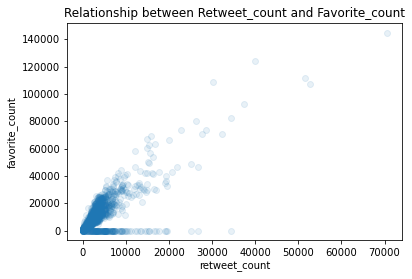

In [63]:
# plot a scatter diagram showing the relationship between the retweets and favorites count.
plt.scatter(data=master, x='retweet_count', y='favorite_count',  alpha =0.1);
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Relationship between Retweet_count and Favorite_count'); 